<a href="https://colab.research.google.com/github/dudu1626/MVP-Sprint-02/blob/main/MVP_sprint_2_Eduardo_Ferreira_Goncalves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP da Sprint Machine Learning & Analytics
---

### Machine Learning e Deep Learning aplicados à saúde

*Trabalho desenvolvido por: Eduardo Ferreira Gonçalves*

**<font color='red' size=5>Observação</font>**<br>
Aconselha-se o uso de GPU para execução deste notebook.<br>
Se não houver o uso de GPU o tempo de processamento desta será de  aproximandamente 5 horas.<br>
Caso contrário, o tempo é de pouco mais de 1 hora.

<a name="sumario"></a>
## Sumário
### [Parte 1 - Machine learning](#parte1)
1. [Definição do problema](#problema) <br>
2. [Bibliotecas e configurações](#importacoes)<br>
3. [Carregamento e qualidade dos dados](#load)
4. [Pré-processamento](#processamento)
5. [Separação dos dados](#treino&teste)
6. [Definição dos modelos](#modelos)
7. [Parâmetros da validação cruzada](#kfold)
8. [Transformações e imputações](#transformacoes)
9. [Criação dos pipelines](#pipelines)
10. [Seleção dos modelos](#selecaoModelo)
11. [Feature Selection](#features)
12. [Otimização dos hiperparâmetros](#otimizacao)
13. [Avaliação dos resultados](#resultados)
14. [Conclusão](#conclusao)

---
### [Parte 2 - Deep learning](#parte2)
1. [Definição do problema](#problema-2) <br>
2. [Instalações necessárias](#instalacoes-2)<br>
3. [Bibliotecas e configurações](#importacoes-2)<br>
4. [Carregamento e qualidade dos dados](#load-2)
5. [Separação dos dados](#treino&teste-2)
6. [Pré-processamento](#processamento-2)
7. [Definição do modelo](#modelos-2)
8. [Visualização de acurácia vs perda](#accvsloss)
9. [Carregamento da melhor configuração do modelo](#melhorModelo)
10. [Execução do modelo no conjunto de treino](#previsao)
11. [Avaliação do modelo](#resultados-2)
12. [Conclusão](#conclusao-2)
---

## Introdução

A ciência de dados com o uso de **machine learning** e **redes neurais artificiais** podem desempenhar um papel crucial na área da saúde, proporcionando avanços significativos no diagnóstico, tratamento e prevenção de doenças. O uso dessas tecnologias permite uma análise mais profunda e abrangente dos dados de saúde, possibilitando a identificação de padrões e tendências que seriam difíceis de detectar através de métodos tradicionais. Uma vez que é possível processar grandes volumes de informações clínicas e genéticas, permitindo uma tomada de decisão mais precisa e personalizada.


Com essa utilização será possível ajudar a entender melhor os fatores de risco, a eficácia de determinados tratamentos e a progressão de doenças. Além disso, poderá criar modelos preditivos, capazes de antecipar complicações e oferecer intervenções preventivas, melhorando a qualidade de vida dos pacientes e reduzindo custos para os sistemas de saúde.

<a name="parte1"></a>
# Parte 1 - Machine learning
*Utilização de métodos clássicos - problema de classificação*

<a name="problema"></a>
## 1.1 Definição do Problema

Objetivo:  Demonstrar a viabilidade de treinar um sistema preditivo baseado em um modelo de classificação para identificar o desenvolvimento de sepse, destacando o potencial impacto positivo dessa abordagem na detecção precoce e no tratamento eficaz dessa condição grave.

### 1.1.1 O que é sepse?
A sepse é uma condição médica grave e potencialmente fatal que ocorre como resultado de uma resposta desregulada do organismo a uma infecção. Ela é conhecida como uma "infecção generalizada" ou "envenenamento do sangue". Embora seja uma condição séria, compreender seus principais aspectos pode ajudar a reconhecê-la precocemente e buscar tratamento adequado.

É importante destacar que o reconhecimento precoce dos sinais e sintomas da sepse é fundamental para um tratamento eficaz. Os principais sinais incluem:
- febre alta ou baixa
- frequência cardíaca acelerada
- respiração rápida
- confusão mental
- diminuição da produção de urina
- manchas avermelhadas na pele.

No tratamento da sepse, os médicos geralmente prescrevem antibióticos para combater a infecção subjacente. Além disso, podem ser necessárias medidas de suporte, como reposição de líquidos intravenosos, administração de medicamentos para manter a pressão arterial adequada e suporte respiratório, se necessário. Em casos mais graves, a internação em uma unidade de terapia intensiva pode ser necessária.

A sepse é uma condição séria que requer atenção e ação rápidas. Compreender suas características principais, principais causas e consequências é fundamental para ajudar a identificá-la precocemente e buscar cuidados médicos adequados.

### 1.1.2 Hipótese
Acredita-se que seja possível treinar um modelo de classificação que tenha uma boa acurácia para prever a sepse.

### 1.1.3 Restrições/condições
Procurou-se datasets nos diversos sites indicados e via a ferramenta de busca de datasets do Google, encontramos 2 no Kaggle que eram promissores. A escolha foi pelo dataset que continha mais features e a possibilidade de ter maior robustez para predição.

### 1.1.4 O dataset escolhido
O dataset escolhido que obtido no site do Kaggle, pode ser acessado através do [link](https://www.kaggle.com/datasets/salikhussaini49/prediction-of-sepsis)<br>
Trata-se de um dataset disponibilizado e utilizado para a competição **PhysioNet/Computing in Cardiology Challenge 2019**<br>



### 1.1.5 Dicionário dos dados

O dicionário apresentado é uma tradução livre do dicionátio obtido no artigo disponibilizado junto ao dataset.

**<p style="text-align: center;">Sinais vitais (colunas 1-8)</p>**

|**Feature**|**Descrição**|
|:---|:---|
|HR|Frequência cardíaca (batidas por minuto)|
|O2Sat|Oximetria de pulso (%)|
|Temp|Temperatura (graus C)|
|SBP|PA sistólica (mm Hg) - presente no SOFA|
|MAP|Pressão arterial média (mm Hg) - presente no SOFA|
|DBP|PA diastólica (mm Hg) - presente no SOFA|
|Resp|Taxa de respiração (respirações por minuto)|
|EtCO2|Dióxido de carbono corrente final (mm Hg)|



**<p style="text-align: center;">Valores laboratoriais (colunas 9-34)</p>**

|**Feature**|**Descrição**|
|:---|:---|
|BaseExcess|Medida do excesso de bicarbonato (mmol/L)|
|HCO3|Bicarbonato (mmol/L)|
|FiO2|Fração de oxigênio inspirado (%)<br> presente no SOFA(como parte de uma medida)|
|pH|N/A|
|PaCO2|Pressão parcial de dióxido de carbono do sangue arterial (mm Hg)<br>No SOFA a pressão medida é de O2|
|SaO2|Saturação de oxigênio do sangue arterial (%)|
|AST|Aspartato transaminase (UI/L)|
|BUN|Nitrogênio ureico no sangue (mg/dL)|
|Alkalinephos|Fosfatase alcalina (UI/L)|
|Calcium|Cálcio (mg/dL)|
|Chloride|Cloreto(mmol/L)|
|Creatinine|Creatinina(mg/dL) - presente no SOFA|
|Bilirubin_direct|Bilirrubina direta (mg/dL) - presente no SOFA|
|Glucose|Glicose (mg/dL)|
|Lactate|Ácido lático (mg/dL)|
|Magnesium|Magnésio(mmol/dL)|
|Phosphate|Fosfato(mg/dL)|
|Potassium|Potássio(mmol/L)|
|Bilirubin_total|Bilirrubina total (mg/dL) - presente no SOFA|
|TroponinI|Troponina I (ng/mL)|
|Hct|Hematócrito (%)|
|Hgb|Hemoglobina (g/dL)|
|PTT|Tempo de tromboplastina parcial (segundos)|
|WBC|Contagem de leucócitos (contagem*10^3/µL)|
|Fibrinogen|Fibrinogênio(mg/dL)|
|Platelets|Plaquetas(count*10^3/µL) - presente no SOFA|



**<p style="text-align: center;">Dados demográficos (colunas 35-40)</p>**

|**Feature**|**Descrição**|
|:---|:---|
|Age|Anos (100 para pacientes com 90 anos ou mais)|
|Gender|Feminino (0) ou Masculino (1)|
|Unit1|Identificador administrativo para unidade de UTI (MICU)|
|Unit2|Identificador administrativo para unidade de UTI(SICU)|
|HospAdmTime|Horas entre a internação no hospital e a internação na UTI|
|ICULOS|Tempo de internação na UTI (horas desde a internação na UTI)|



**<p style="text-align: center;">Resultado (coluna 35-41)</p>**

|**Feature**|**Descrição**|
|:---|:---|
|SepsisLabel|Para pacientes com sepse, SepsisLabel is 1 if t ≥ tsepsis − 6 e 0 if t < tsepsis − 6. Para pacientes sem sepse, SepsisLabel is 0.|



---
Para efeito de comparação, o Hospital Israelita Albert Einstein utiliza o protocolo chamado qSOFA (quickSOFA - 2016) para o gerenciamento de sepse baseado em uma pontuação que se propõe a quantificar e prever a progressão de um paciente desenvolver o quadro. Conforme podemos conferir no [link](https://medicalsuite.einstein.br/pratica-medica/Pathways/Protocolo-Gerenciado-de%20-SepseeChoque-Septico-paraoDiagnosticoeTratamento.pdf). <br>
Na descrição apresentada do dicionário dos dados, colocou-se a informação adicional para informar se a feature está presente no cálculo do escore de risco qSOFA, mesmo que de maneira parcial (neste dataset não há a medição de nível de conciência (Glasgow coma scale).<br>

[(voltar para o sumário)](#sumario)<br>

<a name="importacoes"></a>
## 1.2 Importação das bibliotecas e configurações gerais

In [ ]:
# manipulação
import pandas as pd
import numpy as np

#visualização
import matplotlib.pyplot as plt

# seleção de modelos
from sklearn.model_selection import (train_test_split, StratifiedKFold, cross_val_score,
                                     GridSearchCV, RandomizedSearchCV)

# imputer // atriburição
from sklearn.impute import SimpleImputer

# pré-processamento
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)

# pipeline
from sklearn.pipeline import Pipeline

# seleção de feature
from sklearn.feature_selection import (f_classif, SelectKBest)

# Métricas
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                             classification_report)

# modelos simples
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ensembles
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
                              VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier)

import xgboost as xgb

In [ ]:
# configurar o pandas para mostrar todas as colunas/atributos do dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Variável global

SEED = 42

[voltar para o sumário](#sumario)

<a name="load"></a>
## 1.3 Carregamento e qualidade dos dados

In [ ]:
# caminho para uso local
#path = 'dados/Prediction of Sepsis/Dataset.csv'
#dados = pd.read_csv(path)

# url para uso no colab
url = "https://media.githubusercontent.com/media/dudu1626/datasets-publicos/main/sepse/Dataset.csv"
dados = pd.read_csv(url)

#visualizar os 5 primeiros registros
dados.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


Só com as 5 primeiras linhas podemos perceber que há muitos registros faltantes, a primeira coluna é dispensável (um índice) e na última coluna o ID do paciente, junto com a coluna hour e ICULOS indica que há muitos registros referente ao mesmo paciente.

In [ ]:
# Confirmação do tamanho do dataset
dados.shape

(1552210, 44)

O dataset originalmente tem mais de 1,5 milhão de linhas e 44 colunas

In [ ]:
# exclusão da primeira coluna que está sem nome (Unnamed)
dados = dados.iloc[:,1:]
dados.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,26.0,0.4,NaN,NaN,NaN,NaN,23.0,NaN,9.6,104.0,0.8,NaN,161.0,NaN,1.6,2.1,3.2,NaN,NaN,29.7,9.5,30.6,11.3,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


Podemos observar ainda que o dataset é muito grande, mas podemos identificar que é por causa de como ele foi produzido.

In [ ]:
# contabilizar quantas vezes cada paciente se repete
dados.Patient_ID.value_counts()

3658      336
114471    336
101922    336
117406    336
4905      336
         ... 
110085      8
16854       8
118844      8
16161       8
109559      8
Name: Patient_ID, Length: 40336, dtype: int64

Existem 40.336 pacientes únicos que se repetem de 336 a 8 vezes.

In [ ]:
# observar aleatoriamente um dos IDs (5º da lista apresentada acima)
dados[dados['Patient_ID'] == 4905]

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
480843,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,1,0,4905
480844,1,91.0,99.5,36.06,103.5,55.50,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,2,0,4905
480845,2,95.0,100.0,35.67,110.5,61.83,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,3,0,4905
480846,3,96.0,100.0,37.20,109.0,65.00,NaN,23.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,4,0,4905
480847,4,100.0,100.0,36.57,91.0,44.33,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,5,0,4905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481174,331,76.0,98.0,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,332,0,4905
481175,332,75.0,94.5,34.89,105.0,52.33,NaN,21.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,333,0,4905
481176,333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,334,0,4905
481177,334,74.0,92.0,NaN,111.0,62.33,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.44,1,1.0,0.0,-49.05,335,0,4905


Podemos perceber que os pacientes se repetem no dataframe conforme a mudança na janela de horários (metodologia usada no hospital) e que algumas informações são coletadas e lançadas em algum momento do tempo que a pessoa está internada.

In [ ]:
# quantidade de dados faltantes por coluna
dados.isna().sum()

Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Age                 

In [ ]:
# Conferência dos tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1552210 non-null  int64  
 1   HR                1398811 non-null  float64
 2   O2Sat             1349474 non-null  float64
 3   Temp              525226 non-null   float64
 4   SBP               1325945 non-null  float64
 5   MAP               1358940 non-null  float64
 6   DBP               1065656 non-null  float64
 7   Resp              1313875 non-null  float64
 8   EtCO2             57636 non-null    float64
 9   BaseExcess        84145 non-null    float64
 10  HCO3              65028 non-null    float64
 11  FiO2              129365 non-null   float64
 12  pH                107573 non-null   float64
 13  PaCO2             86301 non-null    float64
 14  SaO2              53561 non-null    float64
 15  AST               25183 non-null    float64
 16  

Mesmo contendo informações categóricas, todos os dados estão representados de maneira numérica.

[(voltar para o sumário)](#sumario)<br>

<a name="processamento"></a>
## 1.4 Pré-processamento

Uma característica que chamou muita a atenção neste dataset é a quantidade grande de valores ``NaN``, o que é bastante típico na realidade de um hospital que não vai coletar os dados de hora em hora, até porque, conversando com profissionais da saúde somos informados que muitos sinais vitais e dados laboratoriais, via de regra, não mudam abruptamente em uma janela de tempo curta de uma hora e causaria muito custo para uma repetição exaustiva e cara para o paciente e para o sistema de saúde.<br> Diante do exposto, entende-se como razoável considerar como medida do horários as medidas dos horários seguintes ou anteriores para preencher os dados faltantes, atentando para que seja do mesmo paciente para minimizar a quantidade de dados faltantes.

In [ ]:
# preencher parte dos dados faltantes com as medidas que o próprio paciente tem nas janelas de hora
# antes ou depois
dados_agrupados_por_paciente = dados.groupby('Patient_ID', as_index= False)[dados.columns]\
                                            .fillna(method='ffill').fillna(method='bfill')
# os dados serão preenchidos inicialmente de cima para baixo, depois de baixo para cima, conforme disponibilidade

In [ ]:
# conferência da alteração
dados_agrupados_por_paciente

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.80,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,1,0,17072
1,1,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.80,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,2,0,17072
2,2,78.0,100.0,35.78,129.0,42.5,69.0,16.5,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.80,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,3,0,17072
3,3,73.0,100.0,35.78,129.0,42.5,69.0,17.0,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.80,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,4,0,17072
4,4,70.0,100.0,35.78,129.0,74.0,69.0,14.0,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.80,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,36.10,121.0,77.0,54.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,9.2,NaN,0.37,NaN,112.0,NaN,2.3,NaN,4.5,NaN,NaN,33.8,10.3,NaN,5.7,NaN,260.0,88.00,0,1.0,0.0,-2.93,22,0,113911
1552206,22,80.0,92.0,36.10,102.0,73.0,51.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,9.2,NaN,0.37,NaN,112.0,NaN,2.3,NaN,4.5,NaN,NaN,33.8,10.3,NaN,5.7,NaN,260.0,88.00,0,1.0,0.0,-2.93,23,0,113911
1552207,23,95.0,97.0,36.70,128.5,83.0,58.5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,9.2,NaN,0.37,NaN,163.0,NaN,2.3,NaN,4.5,NaN,NaN,33.8,10.3,NaN,5.7,NaN,260.0,88.00,0,1.0,0.0,-2.93,24,0,113911
1552208,24,104.0,99.0,36.70,127.0,85.0,59.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,9.2,NaN,0.37,NaN,163.0,NaN,2.3,NaN,4.5,NaN,NaN,33.8,10.3,NaN,5.7,NaN,260.0,88.00,0,1.0,0.0,-2.93,25,0,113911


In [ ]:
# conferência do número de dados faltantes
dados_agrupados_por_paciente.isna().sum()

Hour                   0
HR                     0
O2Sat                  0
Temp                   0
SBP                    0
MAP                    0
DBP                    0
Resp                   0
EtCO2                133
BaseExcess          2372
HCO3                2372
FiO2                 154
pH                   154
PaCO2                154
SaO2                 154
AST                   26
BUN                    0
Alkalinephos          26
Calcium                0
Chloride             154
Creatinine             0
Bilirubin_direct     380
Glucose                0
Lactate              154
Magnesium              0
Phosphate             26
Potassium              0
Bilirubin_total       26
TroponinI             43
Hct                    0
Hgb                    0
PTT                  459
WBC                    0
Fibrinogen           459
Platelets              0
Age                    0
Gender                 0
Unit1                  0
Unit2                  0
HospAdmTime            0


Com o método de imputação de dados escolhido, conseguiu-se minimizar considerávelmente o número de dados faltantes usando os dados reais de cada paciente.

### 1.4.1 Limpeza

Ao analisar o dataframe, percebmos que há 3 tipos de pacientes:
- os que desenvolveram sepse antes de entrar no cti,
- os que desenvolveram depois de entrar na cti,
- os que não desenvolveram sepse.

Como proposta deste estudo escolheu-se gerar um modelo que preveja a evolução do quadro de saúde para sepse com os dados provenientes da primeira hora de admissão.<br>
Como não faz sentido prever um paciente que já dê entrada com o quadro de sepse, excluiremos esses registros:<br>
    ```
    dados_agrupados_por_paciente['Hour'] == 0 & dados_agrupados_por_paciente['SepsisLabel'] == 1
    ```

In [ ]:
#selecionar todos os pacientes que entraram já com sepse
pacientes_com_sepse_antes = dados_agrupados_por_paciente.query("Hour == 0 & SepsisLabel == 1")
pacientes_com_sepse_antes

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
912,0,80.0,92.0,36.22,86.5,57.50,64.0,18.0,34.0,-1.0,25.0,1.00,7.36,46.0,78.0,8.0,19.0,106.0,7.8,101.0,2.90,2.60,66.0,4.70,1.6,2.6,3.4,0.6,2.70,32.9,10.1,150.0,21.4,190.0,217.0,70.13,0,1.0,0.0,-2.55,1,1,5328
6520,0,67.0,97.0,37.33,97.0,53.67,63.5,18.0,34.0,-1.0,28.0,1.00,7.38,39.0,98.0,227.0,3.0,97.0,8.6,102.0,0.60,1.10,130.0,2.90,1.6,5.3,4.4,6.2,20.60,28.4,10.3,41.4,6.7,400.0,77.0,86.77,1,1.0,0.0,-0.06,1,1,7911
9072,0,68.0,98.0,36.67,134.0,81.50,58.0,18.0,34.0,-4.0,26.0,1.00,7.27,31.0,51.0,193.0,33.0,198.0,8.1,101.0,1.40,1.50,201.0,11.90,2.0,5.6,6.7,5.6,41.50,28.4,9.4,37.9,14.5,50.0,167.0,84.61,1,1.0,0.0,-0.02,2,1,10209
14375,0,62.0,99.5,36.72,107.0,81.50,46.0,15.0,34.0,-7.0,23.0,1.00,7.35,31.0,98.0,61.0,14.0,47.0,8.2,106.0,0.90,7.80,162.0,8.30,1.7,2.7,3.7,0.5,13.70,33.6,11.8,54.9,6.0,261.0,154.0,83.13,1,1.0,0.0,-0.03,3,1,7870
17547,0,71.0,100.0,35.33,142.0,85.00,61.0,18.5,34.0,0.0,21.0,1.00,7.45,32.0,77.5,137.0,15.0,47.0,8.4,113.0,1.10,0.20,106.0,1.50,2.2,3.5,5.0,0.4,18.80,33.5,11.3,38.4,16.9,151.0,137.0,77.67,1,0.0,1.0,-0.02,3,1,7987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546361,0,77.0,100.0,37.50,107.0,78.00,60.0,16.0,31.0,-2.8,19.8,0.35,7.47,38.0,96.7,219.0,20.0,73.0,8.0,110.0,0.81,0.10,156.0,0.97,2.1,2.9,3.3,0.6,0.02,34.9,10.7,113.3,13.4,286.0,388.0,57.00,1,1.0,0.0,-0.01,1,1,101843
1546911,0,69.0,100.0,36.10,97.0,73.00,55.0,20.0,27.0,-2.8,19.8,0.40,7.39,38.0,98.2,436.0,25.0,61.0,8.1,105.0,1.25,0.10,84.0,1.23,2.0,1.9,3.9,1.4,1.13,35.4,11.6,34.7,15.1,231.0,166.0,40.00,1,1.0,0.0,-0.07,1,1,111483
1547278,0,95.0,99.0,37.40,102.0,69.00,57.0,16.0,31.0,-2.8,19.8,0.40,7.46,33.0,99.3,205.0,74.0,79.0,6.8,121.0,7.79,0.10,81.0,1.30,1.8,3.5,4.4,0.8,0.03,36.0,12.9,34.7,8.6,231.0,177.0,57.00,1,1.0,0.0,-0.17,1,1,113302
1547804,0,93.0,95.0,37.00,90.0,79.00,67.0,21.0,41.0,-2.8,20.6,0.40,7.33,46.0,96.6,39.0,13.0,78.0,8.3,104.0,1.30,0.20,124.0,3.11,1.8,2.9,3.7,1.7,1.56,43.7,13.9,29.1,16.1,306.0,224.0,56.00,1,1.0,0.0,-4.65,1,1,113192


Depois de identificar que há 426 pacientes que já foram adminitdos com sepse na UTI, vamos retirar todos os registros do dataset.

In [ ]:
# pegar os IDs selecionados e excluir todos os registros
id_pacientes_sepse_antes = pacientes_com_sepse_antes.Patient_ID
linhas_pacientes_sepse_antes = dados_agrupados_por_paciente[dados_agrupados_por_paciente.Patient_ID\
                                                            .isin(id_pacientes_sepse_antes)].index
dados_agrupados_por_paciente.drop(linhas_pacientes_sepse_antes, inplace=True)
dados_agrupados_por_paciente.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.8,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,1,0,17072
1,1,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.8,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,2,0,17072
2,2,78.0,100.0,35.78,129.0,42.5,69.0,16.5,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.8,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,3,0,17072
3,3,73.0,100.0,35.78,129.0,42.5,69.0,17.0,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.8,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,4,0,17072
4,4,70.0,100.0,35.78,129.0,74.0,69.0,14.0,34.0,6.0,26.0,0.4,7.61,27.0,98.0,29.0,23.0,152.0,9.6,104.0,0.8,2.6,161.0,1.9,1.6,2.1,3.2,0.7,0.5,29.7,9.5,30.6,11.3,716.0,330.0,68.54,0,1.0,0.0,-0.02,5,0,17072


**<font color='red'>Observação</font>**<br>
Como já citado anteriormente, a proposta deste estudo é utilizar os dados da hora de admissão do paciente para modelar o sistema preditivo que dirá se o paciente vai desenvolver sepse ou não nas próximas horas.

In [ ]:
# criação de uma função que pega a informação se o paciente vai desenvolver sepse em algum momento
# e trás para a hora zero
def prepara_evolucao(linha_dataframe):
    if(np.any(linha_dataframe['SepsisLabel'])):
        linha_dataframe.loc[linha_dataframe['Hour'] == 0, 'SepsisLabel'] = 1

    return linha_dataframe.loc[linha_dataframe['Hour'] == 0]

In [ ]:
%%time
#aplica a função de evolução criada e reseta o indice
dados_preparados = dados_agrupados_por_paciente.groupby('Patient_ID', as_index=False)\
                                                            .apply(prepara_evolucao)
dados_preparados.reset_index(drop=True, inplace=True)
dados_preparados

CPU times: user 36.4 s, sys: 1.12 s, total: 37.5 s
Wall time: 39.1 s


,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,97.0,95.0,36.11,98.0,75.33,56.0,19.0,34.0,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.70,35.0,193.0,1.00,2.0,3.3,3.8,0.3,1.00,37.2,12.5,29.3,5.7,433.0,317.0,83.14,0,0.0,1.0,-0.03,1,0,1
1,0,61.0,99.0,36.44,124.0,65.00,43.0,17.5,34.0,4.0,22.0,0.70,7.45,46.0,96.0,32.0,100.0,72.0,7.9,113.0,2.50,1.5,78.0,1.90,2.5,4.4,5.1,3.0,41.50,27.8,9.7,30.7,11.0,332.0,158.0,75.91,0,0.0,1.0,-98.60,1,0,2
2,0,87.0,96.0,37.11,131.0,70.33,50.0,29.0,34.0,8.0,32.0,0.50,7.51,41.0,98.0,21.0,31.0,60.0,11.1,99.0,0.90,0.8,51.0,2.10,2.5,2.4,3.8,0.6,0.40,26.9,9.1,30.5,10.0,290.0,488.0,45.82,0,1.0,0.0,-1195.71,1,0,3
3,0,103.5,97.0,36.78,107.5,70.50,52.0,18.0,34.0,0.0,22.0,0.40,7.36,45.0,98.0,102.0,14.0,202.0,8.2,105.0,0.80,28.0,253.0,1.20,1.7,3.8,5.0,6.8,0.90,27.6,8.3,21.3,7.6,211.0,220.0,65.71,0,0.0,1.0,-8.77,1,0,4
4,0,84.0,97.5,37.28,140.5,94.50,49.0,17.5,34.0,0.0,24.0,1.00,7.40,40.0,98.0,16.0,7.0,65.0,7.8,105.0,0.60,0.5,138.0,1.30,1.9,2.8,3.1,0.5,13.40,41.0,14.2,29.0,8.1,452.0,273.0,28.09,1,1.0,0.0,-0.05,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39905,0,80.0,99.0,36.50,146.0,96.00,83.0,21.0,40.0,-9.8,25.4,0.50,7.39,23.0,93.1,849.0,4.0,259.0,8.7,88.0,0.41,0.1,160.0,5.57,1.6,2.9,3.3,3.3,0.01,42.7,13.8,44.4,12.6,552.0,238.0,84.00,0,0.0,1.0,-6.69,1,0,119996
39906,0,76.0,96.0,36.30,118.0,79.00,68.0,14.0,45.0,-1.4,23.8,0.60,7.52,30.0,96.8,24.0,6.0,116.0,9.8,108.0,0.85,0.1,101.5,1.69,3.2,3.1,3.1,0.7,1.09,49.4,16.1,38.2,10.8,192.0,201.0,30.00,1,1.0,0.0,-0.02,1,0,119997
39907,0,91.0,100.0,37.00,156.0,126.00,86.0,19.0,23.0,-11.3,21.8,0.55,7.49,34.3,90.5,9.0,49.0,68.0,7.8,110.0,6.60,0.2,91.0,1.14,1.9,4.1,4.2,0.2,0.05,30.2,9.6,29.6,13.6,167.0,225.0,60.00,0,1.0,0.0,-53.64,1,0,119998
39908,0,94.0,100.0,37.50,132.0,90.00,68.0,20.0,37.0,-4.4,20.8,0.40,7.41,30.0,98.8,33.0,29.0,50.0,8.5,86.0,0.98,0.2,108.0,0.94,1.8,4.3,3.4,0.9,0.01,19.1,6.5,21.3,11.4,252.0,255.0,84.00,0,1.0,0.0,-10.74,1,0,119999


In [ ]:
# liberar memória excluindo dataset que não serão utilizados
del dados
del dados_agrupados_por_paciente
del pacientes_com_sepse_antes

Liberação de parte da memória com os dataset que não serão utilizados para garantir que todo o trabalho ocorra sem contratempo.

[voltar para o sumário](#sumario)

<a name="treino&teste"></a>
## 1.5 Separação dos dados

In [ ]:
# Análise da proporção do desfecho.
# observar a proporção final de quantos pacientes desenvolveram sepse no decorrer
# da internação na UTI
dados_preparados.SepsisLabel.value_counts()

0    37404
1     2506
Name: SepsisLabel, dtype: int64

In [ ]:
#proporção normalizada
dados_preparados.SepsisLabel.value_counts(normalize=True)

0    0.937209
1    0.062791
Name: SepsisLabel, dtype: float64

**<font color='red' size=4>Observação:</font>**<br>
Com essa quantidade de observações desproporcionais, onde somente 6,28% é positivo, ficou impossível fazer com que o modelo generalizasse de uma maneira que a previsão fosse diferente de 0 (não ter sepse).<br>
Durante o desenvolvimento deste trabalho com o dataset desta forma e utilizando a métrica de acurácia não foi possível identificar esse problema, mas ao final como uso de outras métricas e principalmente com a matriz de confusão que pode-se perceber o problema.<br>
Apresentamos o resultado obtidos a seguir:

Report:<br>

|**precision**|**recall**|**f1-score**|**support**|
|:-------:|:----:|:------:|:-----:|
|           0|0.94|1.00|0.97|7481|
|           1|0.00|0.00|0.00|501|
|    accuracy|    |    |0.94|7982|
|   macro avg|0.47|0.50|0.48|7982|
|weighted avg|0.88|0.94|0.91|7982|

Matriz de confusão:<br>
<img src = 'https://github.com/dudu1626/datasets-publicos/blob/main/imagens/Matriz%20de%20confus%C3%A3o%20original.png?raw=true' height="400" width="400">
<br>

Mesmo reduzindo a proporção de 2 observações negativas para uma positiva os resultados de falso negativo (70%) acaba sendo pior que igualar o número de observações.<br>
<img src = 'https://github.com/dudu1626/datasets-publicos/blob/main/imagens/matriz_dobro.png?raw=true' height="400" width="400">
<br>

### 1.5.1 Balanceamento dos dados conforme o desfecho

Diante do acima exposto, escolhemos que o dataset deveria ter o mesmo número de observações com o desfecho negativo e o positivo.<br>
Para evitar algum viés, o modo de seleção desses pacientes, optou-se por fazer de forma aleatória.<br>
A estratégia adotada para equilibrar os dados foi o Undersampling, redução das obsevações que possuem maior quantidade.

In [ ]:
# pegar todos os pacientes que não desenvolveram a sepse e pegar uma amostra com o mesmo número de
# observações dos que desenvolveram
dados_sem_sepse = dados_preparados[dados_preparados.SepsisLabel == 0]
dados_sem_sepse = dados_sem_sepse.sample(n=2506, random_state=SEED)
dados_sem_sepse.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
25415,0,80.5,94.0,34.80,119.0,91.5,71.0,21.0,26.0,-7.1,18.70,0.30,7.47,27.0,98.7,21.0,14.0,56.0,7.90,109.0,0.64,0.10,128.0,1.14,1.5,2.6,3.7,1.2,0.03,31.7,10.5,24.5,8.0,282.0,168.0,75.00,1,0.0,1.0,-504.96,1,0,105341
23607,0,120.0,100.0,38.30,119.5,97.5,82.5,21.0,28.5,-0.8,24.30,1.00,7.37,26.5,99.7,17.0,31.0,69.0,7.80,107.0,1.57,0.47,227.0,3.46,1.6,2.2,4.3,0.9,0.06,18.4,6.0,81.4,12.2,85.0,348.0,62.00,0,1.0,0.0,-205.91,1,0,103518
32736,0,83.0,96.0,35.60,111.0,73.0,51.0,17.0,28.0,-5.5,20.65,1.00,7.32,40.5,93.4,62.0,18.0,25.0,6.90,105.0,0.82,0.30,342.0,1.46,1.4,4.1,4.0,1.4,0.03,22.7,7.8,36.1,6.6,174.0,101.0,73.00,0,0.0,1.0,-81.08,1,0,112739
8792,0,77.0,100.0,36.22,108.0,76.5,60.5,13.0,34.0,3.0,27.00,1.00,7.43,41.0,98.0,169.0,19.0,34.0,8.60,110.0,0.60,1.60,111.5,4.70,2.6,4.2,4.2,2.8,10.80,26.9,9.8,34.0,13.7,174.0,187.0,54.81,0,0.0,1.0,-2.67,2,0,8876
21599,0,104.0,90.0,36.90,84.0,75.0,68.0,19.0,16.5,3.2,27.90,0.21,7.50,29.6,88.4,306.0,55.0,172.0,1.11,93.0,1.85,0.30,89.0,1.70,2.1,2.8,3.2,1.5,2.07,34.0,11.3,21.2,8.5,369.0,231.0,59.00,1,1.0,0.0,-2.19,1,0,101478


In [ ]:
# união entre os dados com sepse e sem sepse
dados_balanceados = pd.concat([dados_sem_sepse, dados_preparados[dados_preparados.SepsisLabel == 1]])
dados_balanceados.shape

(5012, 43)

In [ ]:
# separação de treino e teste.
# retirada do ID do paciente por se tratar de uma informação não relacionada com
# o desfecho e poder gerar confusão ao modelo
X = dados_balanceados.drop(['Hour', 'SepsisLabel', 'Patient_ID'], axis=1)
y = dados_balanceados.SepsisLabel

# separação estratificada para manter a proporção do desfecho
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

[voltar para o sumário](#sumario)

<a name="modelos"></a>
## 1.6 Definição dos modelos

Definição dos modelos de classificação que serão testados.<br>
Será selecionado aquele que melhor performar na métrica de acurácia, sem mexer nos hiperparâmetros.

In [ ]:
# definição de número de árvores para os modelos ensembles que tenham árvores
num_trees = 100

# modelos "simles"
knn = ('KNN', KNeighborsClassifier())
decision_tree = ('CART', DecisionTreeClassifier(random_state=SEED))
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC(random_state=SEED))
logistic_regression = ('LR', LogisticRegression(max_iter=100, random_state=SEED))

# modelos ensembles
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, random_state=SEED, n_jobs=-1))
extra_tree = ('ET', ExtraTreesClassifier(n_estimators=num_trees, random_state=SEED, n_jobs=-1))
ada_boost = ('Ada', AdaBoostClassifier(n_estimators=num_trees, random_state=SEED))
gradient_boost = ('GB', GradientBoostingClassifier(n_estimators=num_trees, random_state=SEED))
bagging_tree = ('Bagging', BaggingClassifier(estimator=DecisionTreeClassifier(random_state=SEED)))

voting = ('Voting', VotingClassifier([logistic_regression, svm, decision_tree]))

xg_boost = ('XGB',xgb.XGBClassifier(random_state=SEED))

[voltar para o sumário](#sumario)

<a name="kfold"></a>
## 1.7 Parâmetros da validação cruzada

Definição dos parâmetros para implementar a validação cruzada estratificada

In [ ]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=SEED)

<a name="transformacoes"></a>
## 1.8 Transformações e imputações

Definição das possíveis transformações numéricas:
- normalização
- padronização


Definição das formas de se imputar dados nas observações com dados faltantes:
- moda
- média
- mediana
- zero

In [ ]:
# Transformações que serão testadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# imputações possíveis para os valores faltantes
imputer_moda = ('SimpleImputer_moda', SimpleImputer(strategy="most_frequent"))
imputer_media = ('SimpleImputer_mean', SimpleImputer(strategy="mean"))
imputer_mediana = ('SimpleImputer_median', SimpleImputer(strategy="median"))
imputer_zero = ('SimpleImputer_zero', SimpleImputer(strategy='constant', fill_value=0 ))

<a name="pipelines"></a>
## 1.9 Criação dos pipelines

In [ ]:
# criação de lista vazia para apensar os modelos para usar os pipelines
pipelines = []
resultados = []
nomes = []

Criação das combinações dos pipelines com imputação dos valores faltantes e modelos.<br>
A primeira parte é com os dados numéricos sem manipulção.

In [ ]:
# valores originais (usando moda)
pipelines.append(('KNN-orig-moda', Pipeline([imputer_moda, knn])))
pipelines.append(('CART-orig-moda', Pipeline([imputer_moda, decision_tree])))
pipelines.append(('NB-orig-moda', Pipeline([imputer_moda, naive_bayes])))
pipelines.append(('SVM-orig-moda', Pipeline([imputer_moda, svm])))
pipelines.append(('LR-orig-moda', Pipeline([imputer_moda, logistic_regression])))
pipelines.append(('RF-orig-moda', Pipeline([imputer_moda, random_forest])))
pipelines.append(('ET-orig-moda', Pipeline([imputer_moda, extra_tree])))
pipelines.append(('Ada-orig-moda', Pipeline([imputer_moda, ada_boost])))
pipelines.append(('GB-orig-moda', Pipeline([imputer_moda, gradient_boost])))
pipelines.append(('Bag-orig-moda', Pipeline([imputer_moda, bagging_tree])))
pipelines.append(('XGB-orig-moda', Pipeline([imputer_moda, xg_boost])))
pipelines.append(('Vot-orig-moda', Pipeline([imputer_moda, voting])))

In [ ]:
# valores originais (usando media)
pipelines.append(('KNN-orig-media', Pipeline([imputer_media, knn])))
pipelines.append(('CART-orig-media', Pipeline([imputer_media, decision_tree])))
pipelines.append(('NB-orig-media', Pipeline([imputer_media, naive_bayes])))
pipelines.append(('SVM-orig-media', Pipeline([imputer_media, svm])))
pipelines.append(('LR-orig-media', Pipeline([imputer_media, logistic_regression])))
pipelines.append(('RF-orig-media', Pipeline([imputer_media, random_forest])))
pipelines.append(('ET-orig-media', Pipeline([imputer_media, extra_tree])))
pipelines.append(('Ada-orig-media', Pipeline([imputer_media, ada_boost])))
pipelines.append(('GB-orig-media', Pipeline([imputer_media, gradient_boost])))
pipelines.append(('Bag-orig-media', Pipeline([imputer_media, bagging_tree])))
pipelines.append(('XGB-orig-media', Pipeline([imputer_media, xg_boost])))
pipelines.append(('Vot-orig-media', Pipeline([imputer_media, voting])))

In [ ]:
# valores originais (usando mediana)
pipelines.append(('KNN-orig-mediana', Pipeline([imputer_mediana, knn])))
pipelines.append(('CART-orig-mediana', Pipeline([imputer_mediana, decision_tree])))
pipelines.append(('NB-orig-mediana', Pipeline([imputer_mediana, naive_bayes])))
pipelines.append(('SVM-orig-mediana', Pipeline([imputer_mediana, svm])))
pipelines.append(('LR-orig-mediana', Pipeline([imputer_mediana, logistic_regression])))
pipelines.append(('RF-orig-mediana', Pipeline([imputer_mediana, random_forest])))
pipelines.append(('ET-orig-mediana', Pipeline([imputer_mediana, extra_tree])))
pipelines.append(('Ada-orig-mediana', Pipeline([imputer_mediana, ada_boost])))
pipelines.append(('GB-orig-mediana', Pipeline([imputer_mediana, gradient_boost])))
pipelines.append(('Bag-orig-mediana', Pipeline([imputer_mediana, bagging_tree])))
pipelines.append(('XGB-orig-mediana', Pipeline([imputer_mediana, xg_boost])))
pipelines.append(('Vot-orig-mediana', Pipeline([imputer_mediana, voting])))

In [ ]:
# valores originais (usando zero)
pipelines.append(('KNN-orig-zero', Pipeline([imputer_zero, knn])))
pipelines.append(('CART-orig-zero', Pipeline([imputer_zero, decision_tree])))
pipelines.append(('NB-orig-zero', Pipeline([imputer_zero, naive_bayes])))
pipelines.append(('SVM-orig-zero', Pipeline([imputer_zero, svm])))
pipelines.append(('LR-orig-zero', Pipeline([imputer_zero, logistic_regression])))
pipelines.append(('RF-orig-zero', Pipeline([imputer_zero, random_forest])))
pipelines.append(('ET-orig-zero', Pipeline([imputer_zero, extra_tree])))
pipelines.append(('Ada-orig-zero', Pipeline([imputer_zero, ada_boost])))
pipelines.append(('GB-orig-zero', Pipeline([imputer_zero, gradient_boost])))
pipelines.append(('Bag-orig-zero', Pipeline([imputer_zero, bagging_tree])))
pipelines.append(('XGB-orig-zero', Pipeline([imputer_zero, xg_boost])))
pipelines.append(('Vot-orig-zero', Pipeline([imputer_zero, voting])))

Criação das combinações dos pipelines com imputação dos valores faltantes, transformação dos dados numéricos e modelos

In [ ]:
# valores padronizados (usando moda)
pipelines.append(('KNN-padr-moda', Pipeline([imputer_moda, standard_scaler, knn])))
pipelines.append(('CART-padr-moda', Pipeline([imputer_moda, standard_scaler, decision_tree])))
pipelines.append(('NB-padr-moda', Pipeline([imputer_moda, standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr-moda', Pipeline([imputer_moda, standard_scaler, svm])))
pipelines.append(('LR-padr-moda', Pipeline([imputer_moda, standard_scaler, logistic_regression])))
pipelines.append(('RF-padr-moda', Pipeline([imputer_moda, standard_scaler, random_forest])))
pipelines.append(('ET-padr-moda', Pipeline([imputer_moda, standard_scaler, extra_tree])))
pipelines.append(('Ada-padr-moda', Pipeline([imputer_moda, standard_scaler, ada_boost])))
pipelines.append(('GB-padr-moda', Pipeline([imputer_moda, standard_scaler, gradient_boost])))
pipelines.append(('Bag-padr-moda', Pipeline([imputer_moda, standard_scaler, bagging_tree])))
pipelines.append(('XGB-padr-moda', Pipeline([imputer_moda, standard_scaler, xg_boost])))
pipelines.append(('Vot-padr-moda', Pipeline([imputer_moda, standard_scaler, voting])))

In [ ]:
# valores padronizados (com media)
pipelines.append(('KNN-padr-media', Pipeline([imputer_media, standard_scaler, knn])))
pipelines.append(('CART-padr-media', Pipeline([imputer_media, standard_scaler, decision_tree])))
pipelines.append(('NB-padr-media', Pipeline([imputer_media, standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr-media', Pipeline([imputer_media, standard_scaler, svm])))
pipelines.append(('LR-padr-media', Pipeline([imputer_media, standard_scaler, logistic_regression])))
pipelines.append(('RF-padr-media', Pipeline([imputer_media, standard_scaler, random_forest])))
pipelines.append(('ET-padr-media', Pipeline([imputer_media, standard_scaler, extra_tree])))
pipelines.append(('Ada-padr-media', Pipeline([imputer_media, standard_scaler, ada_boost])))
pipelines.append(('GB-padr-media', Pipeline([imputer_media, standard_scaler, gradient_boost])))
pipelines.append(('Bag-padr-media', Pipeline([imputer_media, standard_scaler, bagging_tree])))
pipelines.append(('XGB-padr-media', Pipeline([imputer_media, standard_scaler, xg_boost])))
pipelines.append(('Vot-padr-media', Pipeline([imputer_media, standard_scaler, voting])))

In [ ]:
# valores padronizados (com mediana)
pipelines.append(('KNN-padr-mediana', Pipeline([imputer_mediana, standard_scaler, knn])))
pipelines.append(('CART-padr-mediana', Pipeline([imputer_mediana, standard_scaler, decision_tree])))
pipelines.append(('NB-padr-mediana', Pipeline([imputer_mediana, standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr-mediana', Pipeline([imputer_mediana, standard_scaler, svm])))
pipelines.append(('LR-padr-mediana', Pipeline([imputer_mediana, standard_scaler, logistic_regression])))
pipelines.append(('RF-padr-mediana', Pipeline([imputer_mediana, standard_scaler, random_forest])))
pipelines.append(('ET-padr-mediana', Pipeline([imputer_mediana, standard_scaler, extra_tree])))
pipelines.append(('Ada-padr-mediana', Pipeline([imputer_mediana, standard_scaler, ada_boost])))
pipelines.append(('GB-padr-mediana', Pipeline([imputer_mediana, standard_scaler, gradient_boost])))
pipelines.append(('Bag-padr-mediana', Pipeline([imputer_mediana, standard_scaler, bagging_tree])))
pipelines.append(('XGB-padr-mediana', Pipeline([imputer_mediana, standard_scaler, xg_boost])))
pipelines.append(('Vot-padr-mediana', Pipeline([imputer_mediana, standard_scaler, voting])))

In [ ]:
# valores padronizado (usando zero)
pipelines.append(('KNN-padr-zero', Pipeline([imputer_zero, standard_scaler, knn])))
pipelines.append(('CART-padr-zero', Pipeline([imputer_zero, standard_scaler, decision_tree])))
pipelines.append(('NB-padr-zero', Pipeline([imputer_zero, standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr-zero', Pipeline([imputer_zero, standard_scaler, svm])))
pipelines.append(('LR-padr-zero', Pipeline([imputer_zero, standard_scaler, logistic_regression])))
pipelines.append(('RF-padr-zero', Pipeline([imputer_zero, standard_scaler, random_forest])))
pipelines.append(('ET-padr-zero', Pipeline([imputer_zero, standard_scaler, extra_tree])))
pipelines.append(('Ada-padr-zero', Pipeline([imputer_zero, standard_scaler, ada_boost])))
pipelines.append(('GB-padr-zero', Pipeline([imputer_zero, standard_scaler, gradient_boost])))
pipelines.append(('Bag-padr-zero', Pipeline([imputer_zero, standard_scaler, bagging_tree])))
pipelines.append(('XGB-padr-zero', Pipeline([imputer_zero, standard_scaler, xg_boost])))
pipelines.append(('Vot-padr-zero', Pipeline([imputer_zero, standard_scaler, voting])))

In [ ]:
# valores normalizados (com moda)
pipelines.append(('KNN-norm-moda', Pipeline([imputer_moda, min_max_scaler, knn])))
pipelines.append(('CART-norm-moda', Pipeline([imputer_moda, min_max_scaler, decision_tree])))
pipelines.append(('NB-norm-moda', Pipeline([imputer_moda, min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm-moda', Pipeline([imputer_moda, min_max_scaler, svm])))
pipelines.append(('LR-norm-moda', Pipeline([imputer_moda, min_max_scaler, logistic_regression])))
pipelines.append(('RF-norm-moda', Pipeline([imputer_moda, min_max_scaler, random_forest])))
pipelines.append(('ET-norm-moda', Pipeline([imputer_moda, min_max_scaler, extra_tree])))
pipelines.append(('Ada-norm-moda', Pipeline([imputer_moda, min_max_scaler, ada_boost])))
pipelines.append(('GB-norm-moda', Pipeline([imputer_moda, min_max_scaler, gradient_boost])))
pipelines.append(('Bag-norm-moda', Pipeline([imputer_moda, min_max_scaler, bagging_tree])))
pipelines.append(('XGB-norm-moda', Pipeline([imputer_moda, min_max_scaler, xg_boost])))
pipelines.append(('Vot-norm-moda', Pipeline([imputer_moda, min_max_scaler, voting])))

In [ ]:
# valores normalizados (com media)
pipelines.append(('KNN-norm-media', Pipeline([imputer_media, min_max_scaler, knn])))
pipelines.append(('CART-norm-media', Pipeline([imputer_media, min_max_scaler, decision_tree])))
pipelines.append(('NB-norm-media', Pipeline([imputer_media, min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm-media', Pipeline([imputer_media, min_max_scaler, svm])))
pipelines.append(('LR-norm-media', Pipeline([imputer_media, min_max_scaler, logistic_regression])))
pipelines.append(('RF-norm-media', Pipeline([imputer_media, min_max_scaler, random_forest])))
pipelines.append(('ET-norm-media', Pipeline([imputer_media, min_max_scaler, extra_tree])))
pipelines.append(('Ada-norm-media', Pipeline([imputer_media, min_max_scaler, ada_boost])))
pipelines.append(('GB-norm-media', Pipeline([imputer_media, min_max_scaler, gradient_boost])))
pipelines.append(('Bag-norm-media', Pipeline([imputer_media, min_max_scaler, bagging_tree])))
pipelines.append(('XGB-norm-media', Pipeline([imputer_media, min_max_scaler, xg_boost])))
pipelines.append(('Vot-norm-media', Pipeline([imputer_media, min_max_scaler, voting])))

In [ ]:
# valores normalizados (com mediana)
pipelines.append(('KNN-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, knn])))
pipelines.append(('CART-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, decision_tree])))
pipelines.append(('NB-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, svm])))
pipelines.append(('LR-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, logistic_regression])))
pipelines.append(('RF-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, random_forest])))
pipelines.append(('ET-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, extra_tree])))
pipelines.append(('Ada-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, ada_boost])))
pipelines.append(('GB-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, gradient_boost])))
pipelines.append(('Bag-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, bagging_tree])))
pipelines.append(('XGB-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, xg_boost])))
pipelines.append(('Vot-norm-mediana', Pipeline([imputer_mediana, min_max_scaler, voting])))

In [ ]:
# valores normalizados (usando zero)
pipelines.append(('KNN-norm-zero', Pipeline([imputer_zero, min_max_scaler, knn])))
pipelines.append(('CART-norm-zero', Pipeline([imputer_zero, min_max_scaler, decision_tree])))
pipelines.append(('NB-norm-zero', Pipeline([imputer_zero, min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm-zero', Pipeline([imputer_zero, min_max_scaler, svm])))
pipelines.append(('LR-norm-zero', Pipeline([imputer_zero, min_max_scaler, logistic_regression])))
pipelines.append(('RF-norm-zero', Pipeline([imputer_zero, min_max_scaler, random_forest])))
pipelines.append(('ET-norm-zero', Pipeline([imputer_zero, min_max_scaler, extra_tree])))
pipelines.append(('Ada-norm-zero', Pipeline([imputer_zero, min_max_scaler, ada_boost])))
pipelines.append(('GB-norm-zero', Pipeline([imputer_zero, min_max_scaler, gradient_boost])))
pipelines.append(('Bag-norm-zero', Pipeline([imputer_zero, min_max_scaler, bagging_tree])))
pipelines.append(('XGB-norm-zero', Pipeline([imputer_zero, min_max_scaler, xg_boost])))
pipelines.append(('Vot-norm-zero', Pipeline([imputer_zero, min_max_scaler, voting])))

[voltar para o sumário](#sumario)

<a name="selecaoModelo"></a>
## 1.10  Seleção dos modelos

Para a seleção do melhor modelo, usaremos a validação cruzada configurada anteriormente e a pontuação será a acurácia média.

In [ ]:
%%time
# Executando os pipelines
for nome, modelo in pipelines:
    cv_results = cross_val_score(modelo, X_train, y_train, cv=kfold, scoring=scoring)
    resultados.append(cv_results)
    nomes.append(nome)
    msg = f"{nome}: acc={cv_results.mean():.4f} ({cv_results.std():.4f})" # formatando para 4 casas decimais
    print(msg)

KNN-orig-moda: acc=0.5410 (0.0191)
CART-orig-moda: acc=0.5730 (0.0285)
NB-orig-moda: acc=0.5652 (0.0136)
SVM-orig-moda: acc=0.5844 (0.0189)
LR-orig-moda: acc=0.6014 (0.0286)
RF-orig-moda: acc=0.6533 (0.0271)
ET-orig-moda: acc=0.6386 (0.0287)
Ada-orig-moda: acc=0.6298 (0.0284)
GB-orig-moda: acc=0.6618 (0.0219)
Bag-orig-moda: acc=0.6101 (0.0260)
XGB-orig-moda: acc=0.6575 (0.0219)
Vot-orig-moda: acc=0.5977 (0.0284)
KNN-orig-media: acc=0.5410 (0.0191)
CART-orig-media: acc=0.5747 (0.0275)
NB-orig-media: acc=0.5652 (0.0136)
SVM-orig-media: acc=0.5849 (0.0196)
LR-orig-media: acc=0.6014 (0.0299)
RF-orig-media: acc=0.6520 (0.0234)
ET-orig-media: acc=0.6328 (0.0239)
Ada-orig-media: acc=0.6266 (0.0276)
GB-orig-media: acc=0.6548 (0.0199)
Bag-orig-media: acc=0.6248 (0.0245)
XGB-orig-media: acc=0.6513 (0.0195)
Vot-orig-media: acc=0.5996 (0.0263)
KNN-orig-mediana: acc=0.5410 (0.0191)
CART-orig-mediana: acc=0.5762 (0.0286)
NB-orig-mediana: acc=0.5652 (0.0136)
SVM-orig-mediana: acc=0.5847 (0.0190)
LR-o

In [ ]:
# calculo da média
media_resultado = []
for i in resultados:
    media_resultado.append(i.mean())
media_resultado

# apresentação dos melhores resultados
df = pd.DataFrame(list(zip(nomes, media_resultado)), columns = ['modelo','acuracia_media'])
df.shape

(144, 2)

Foram testados 144 combinações diferentes de modelos, imputações e transformação.

In [ ]:
# apresentar os 5 melhores modelos
df.sort_values(by=['acuracia_media'], ascending=False).head()

,modelo,acuracia_media
56,GB-padr-moda,0.662509
104,GB-norm-moda,0.662011
8,GB-orig-moda,0.661761
44,GB-orig-zero,0.660764
92,GB-padr-zero,0.660764


Os 5 melhores resultados foram do mesmo modelo: ``GradientBoostingClassifier``

[voltar para o sumário](#sumario)

<a name="features"></a>
## 1.11 Feature Selection

Antes de selecionar as features, vamos ter que preparar os dados conforme o resultado obtido

### 1.11.1 imputação dos valores faltantes
Conforme o modelo "vencedor" a imputação será a moda.<br>
Atenção especial para usar somente os dados de treino para obter a moda e imputar nos dos conjuntos e evitar o vazamento de dados.

In [ ]:
# manipulação necessária para transformar o dataframe de moda do X_train para completar os
# valores NaN do X_test e não causar vazamento de informação
dic_moda = X_train.mode().dropna().to_dict()

dic_moda_xtrain = {}
for chave, valor in dic_moda.items():
    dic_moda_xtrain[chave] = valor[0]

# imputação da moda
X_train.fillna(dic_moda_xtrain, inplace=True)
X_test.fillna(dic_moda_xtrain, inplace=True)

### 1.11.2 Padronização dos valores
Conforme o modelo "vencedor", a transformação dos dados será a padronização.<br>
Atentando para que a média e o desvio padão utilizados seja do conjunto de treino

In [ ]:
# definição de uma função para calcular o valor padronizado
def padronizador(media, desvio_padrao, dados):
    dados_padronizados = (dados - media) / desvio_padrao
    return dados_padronizados

In [ ]:
# Padronização dos valores de treino evitando o vazamento de dados
media = X_train.mean()
desvio_padrao = X_train.std()

X_train_padronizado = padronizador(media, desvio_padrao, X_train)
X_test_padronizado = padronizador(media, desvio_padrao, X_test)

### 1.11.3 K best

Seleção das K features mais significativas para a predição

In [ ]:
# percorrendo o dataframe para descobrir quantas features darão o melhor resultado
features_por_acuracia = []

for k in range(2, len(X_train.columns)+1):
    selector = SelectKBest(score_func=f_classif, k=k)

    X_train_2 = selector.fit_transform(X_train, y_train)
    X_test_2 = selector.transform(X_test)

    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=SEED)
    model.fit(X_train_2, y_train)

    predicao = model.predict(X_test_2)

    score = accuracy_score(y_test, predicao)
    print(f"k = {k} - ACC = {round(score,6)}")

    features_por_acuracia.append(score)

k = 2 - ACC = 0.570289
k = 3 - ACC = 0.581256
k = 4 - ACC = 0.594217
k = 5 - ACC = 0.615155
k = 6 - ACC = 0.606181
k = 7 - ACC = 0.610169
k = 8 - ACC = 0.612164
k = 9 - ACC = 0.596211
k = 10 - ACC = 0.612164
k = 11 - ACC = 0.621137
k = 12 - ACC = 0.631107
k = 13 - ACC = 0.624128
k = 14 - ACC = 0.62014
k = 15 - ACC = 0.622134
k = 16 - ACC = 0.606181
k = 17 - ACC = 0.625125
k = 18 - ACC = 0.618146
k = 19 - ACC = 0.629113
k = 20 - ACC = 0.63011
k = 21 - ACC = 0.632104
k = 22 - ACC = 0.631107
k = 23 - ACC = 0.635095
k = 24 - ACC = 0.631107
k = 25 - ACC = 0.628116
k = 26 - ACC = 0.631107
k = 27 - ACC = 0.628116
k = 28 - ACC = 0.641077
k = 29 - ACC = 0.629113
k = 30 - ACC = 0.643071
k = 31 - ACC = 0.63011
k = 32 - ACC = 0.633101
k = 33 - ACC = 0.643071
k = 34 - ACC = 0.631107
k = 35 - ACC = 0.626122
k = 36 - ACC = 0.631107
k = 37 - ACC = 0.622134
k = 38 - ACC = 0.633101
k = 39 - ACC = 0.632104
k = 40 - ACC = 0.634098


Com esse dataset, o número de features para aumentar a acurácia foi de 30/33 das 40

In [ ]:
#Seleção das 30 melhores features
selector = SelectKBest(score_func=f_classif, k=30)
selector.fit(X_train_padronizado, y_train)
colunas_selecionadas = selector.get_support()

#mostrar quais foram as colunas selecionadas
X_train_padronizado.columns[colunas_selecionadas]

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'HCO3', 'FiO2',
       'pH', 'PaCO2', 'SaO2', 'BUN', 'Calcium', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Magnesium', 'Phosphate',
       'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'],
      dtype='object')

In [ ]:
# ver a pontuação das features
selector.scores_

array([7.53344370e+01, 4.36252287e+00, 1.46214786e+01, 9.99413252e+00,
       3.43532984e+01, 1.37121918e+01, 4.92048338e+01, 4.85491172e-01,
       3.95350407e-01, 1.31378144e+01, 2.75264855e+01, 1.77747717e+00,
       1.04893299e+00, 6.27885913e+00, 5.46805716e-01, 5.08607501e+01,
       1.59622523e-01, 3.84795430e+00, 6.11580417e-03, 2.01918588e+01,
       1.38513924e+01, 9.68096716e+00, 1.40811273e-01, 3.41045263e+00,
       1.06700892e+01, 4.76656407e-01, 4.29043973e+00, 6.84761623e-01,
       2.03647707e+01, 1.91511949e+01, 4.23827960e+00, 1.78172783e+01,
       9.56388182e+00, 2.08772881e-01, 4.60550207e-01, 3.61953467e+00,
       5.84746712e+00, 5.84746712e+00, 3.16226985e+01, 2.56949908e+00])

No protocolo base de comparação (qSOFA), as features presentes em ambos, mesmo que parcialmente, são:<br>
``'SBP', 'MAP', 'DBP', 'FiO2', 'PaCO2', 'Creatinine', 'Bilirubin_direct', 'Bilirubin_total', 'Platelets'``<br>
Ficando ausente a medida de nível de consciência (escala de Glasgow).

In [ ]:
# usando apenas as features selecionadas para a otimização dos hiperparâmetros
X_train_filtrado = X_train_padronizado[X_train_padronizado.columns[colunas_selecionadas]]
X_test_filtrado = X_test_padronizado[X_train_padronizado.columns[colunas_selecionadas]]

# seleção de features usando a escala SOFA para uma comparação limitada
#colunas_sofa = ['SBP', 'MAP', 'DBP', 'FiO2', 'PaCO2', 'Creatinine', 'Bilirubin_direct', 'Bilirubin_total', 'Platelets']
#X_train_sofa = X_train_normalizado[colunas_sofa]
#X_test_sofa = X_test_normalizado[colunas_sofa]

[voltar para o sumário](#sumario)

<a name="otimizacao"></a>
## 1.12 Otimização dos hiperparâmetros

### 1.12.1 Busca através do grid search

In [ ]:
%%time
# os hiperparâmetros escolhidos com base na leitura da documentação do modelo

param_distributions = {
    'n_estimators' : [100, 300, 500],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_features': ['sqrt', 'log2', None],
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01, 0.1]
}


modelo_gradient_boosting = GradientBoostingClassifier(random_state=SEED)

gradient_boosting_search = GridSearchCV(modelo_gradient_boosting, param_grid=param_distributions,
                                        scoring=scoring, cv=kfold, n_jobs=-1)

gradient_boosting_search.fit(X_train_filtrado, y_train)

CPU times: user 13.8 s, sys: 1.57 s, total: 15.4 s
Wall time: 20min 52s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
# obter os hiper parâmetros
gradient_boosting_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_features': None,
 'n_estimators': 300}

### 1.12.2 Busca através do randomized search

In [ ]:
%%time
# os hiperparâmetros escolhidos com base na leitura da documentação do modelo

param_distributions = {
    'n_estimators' : [100, 200, 300, 400, 500, 600],
    'criterion' : ['friedman_mse', 'squared_error'],
    'max_features': ['sqrt', 'log2', None],
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1]
}


modelo_gradient_boosting = GradientBoostingClassifier(random_state=SEED)

random_search = RandomizedSearchCV(modelo_gradient_boosting,
                                   param_distributions=param_distributions,
                                   n_iter=20 , scoring=scoring, cv=kfold,
                                   random_state=SEED, n_jobs=-1)

random_search.fit(X_train_filtrado, y_train)

CPU times: user 9.48 s, sys: 461 ms, total: 9.95 s
Wall time: 6min 50s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=42, scoring='accuracy')

In [ ]:
# obter os hiperparâmetros
random_search.best_params_

{'n_estimators': 400,
 'max_features': None,
 'loss': 'exponential',
 'learning_rate': 0.01,
 'criterion': 'squared_error'}

Utilizando o método de otimização de hiperparâmetros ``RandomizedSearchCV`` conforme codificado acima obtivemos o resultado levemente diferente do ``GridSearchCV``, porque pudemos colocar mais possibilidades de busca para o ``'n_estimators'``, todavia tivemos um ganho de tempo de execução de quase 1/5.<br>
Destaca-se que sabe-se que algumas combinações aleatórias, limitadas ao número de iterações definidas anteriormente.

### 1.12.1 Ajuste do modelo e do dataset para o treinamento

Obtido os valores de melhor ajuste dos hiperparâmetros, vamos estanciar o modelo para treinar com a base de dados

In [ ]:
modelo_tunado_grid = GradientBoostingClassifier(random_state=SEED, criterion= 'friedman_mse',
 learning_rate= 0.1, loss= 'exponential', max_features= 'sqrt', n_estimators= 500)

modelo_tunado_random = GradientBoostingClassifier(random_state=SEED, criterion= 'squared_error',
 learning_rate= 0.01, loss= 'exponential', max_features= None, n_estimators= 400)

In [ ]:
# ajuste do modelo - grid
modelo_tunado_grid.fit(X_train_filtrado, y_train)

# predição com os dados de teste
predicao_grid = modelo_tunado_grid.predict(X_test_filtrado)
#pontuação da predição
accuracy_score(y_test, predicao_grid)

0.6191425722831505

In [ ]:
# ajuste do modelo
modelo_tunado_random.fit(X_train_filtrado, y_train)

# predição com os dados de teste
predicao_random = modelo_tunado_random.predict(X_test_filtrado)
#pontuação da predição
accuracy_score(y_test, predicao_random)

0.634097706879362

Neste notebook a acurácia do modelo com os hiperparâmetros tunados pelo ``RandomizedSearchCV`` ficou melhor que o ``GridSearchCV``, o que não deix dúvida qual modelo de busca escolher, mas se o modelo mais demorado fosse o de melhor pontuação, deveríamos ponderar o que é mais vantajoso (tempo de processamento ou pontuação de acurácia).

[voltar para o sumário](#sumario)

<a name="resultados"></a>
## 1.13 Avaliação dos resultados

Através da matriz de confusão podemos observar os valores reais em proporção aos preditos.<br>
Podemos ainda ver o percentual de verdadeiros e falsos positivos ou negativos.

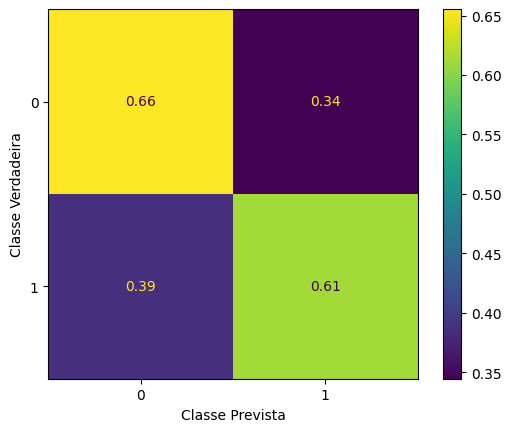

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(y_test, predicao_random, normalize='true')
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

**<font color='red' size=5>Observação</font>**<br>
Conforme apresentado anteriormente, a acurácia sozinha não é sufuciente para um modelo.<br>
Podemos observar que o modelo fez um percentual de verdadeiro negativo de 66% e 61% de verdadeiro positivo, mas como a proposta deste trabalho é aplicação à saúde e o resultado previsto tem consequência direta à vida, a métrica muito importante, talvez a mais importante, é a taxa de falsos negativos, uma vez que a pessoa prevista com negativo terá um acompanhamento menor e poderá desenvolver o desfecho desfavorável.

In [ ]:
print((classification_report(y_test, predicao_random)))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       502
           1       0.64      0.61      0.63       501

    accuracy                           0.63      1003
   macro avg       0.63      0.63      0.63      1003
weighted avg       0.63      0.63      0.63      1003



Em complementação à análise da matriz de confusão, podemos observar as métricas calculadas para complementar a análise do modelo.<br>
Para facilitar a análise do report, destacamos um resumo das méticas e sua importância para o estudo presente

### 1.13.1 Análise das métricas

**Accuracy (Acurácia):**<br>
Além de ser a métrica mais comum, ela é de fácil entendimento, por este motivo foi escolhida para mensurar inicialmente o desempenho dos modelos de classificação deste trabalho. Devido ao fato já préviamente observado quanto ao desbalanciamento da variável target e do problema ser de auxílio em dianóstico na saúde, devemos escolher outras métricas em adição a esta para analisar o modelo.<br>
> ``Acurácia = 63%``

**Recall (revocação):**<br>
É a métrica mais conveniente para o caso aplicado à saúde, principalmente quando o problema está ligado a diagnósticos, visto que mede a proporção dos valores que são de falsos positivos e que foram preditos corretamente em proporção com a soma dos positivos verdadeiros (TP) e os falsos negativos (FN).<br>
Como essa métrica é dividida pelo falso negativo, quanto menor for o FN, maior será o Recall.<br>
O problema do falso negativo é que será feito o diagnóstico de que o paciente não terá sepse, acarretando em menor preocupação de tratamento o que pode levar a óbito.
> ``Recall médio de 63%``

**Precision (Precisão):**<br>
A métrica de precisão indica a proporção de predições positivas que estão corretas, ou seja, quão bem o modelo predisse os valores positivos.<br>
É uma proporção entre os positivos verdadeiros (TP) e os falso positivos (FP).<br>Não é das melhores no nosso caso.
> ``Precision média de 63%``


**F1**:<br>
É a métrica resultante da média harmônica entre a precisão e o recall. É a métrica que consolida as duas anteriores, o que acaba sendo bastante conveniente, pos sopesa os valores de falso negativo e falso positivo.<br>
O f1-score será alto quando ambas as métricas forem altas e similares, ou seja, o f1-score é maior quando há um “meio termo” entre precisão e recall.
> ``f1-score médio de 63%``

**Suport**
Representa o número de dados avaliados para a métrica.

<a name="conclusao"></a>
## 1.14 Conclusão

Considerando toda a análise do modelo, podemos considerar que ele está equilibrado. Não houve um overfit ou underfit, visto que a acurácia de treinamento foi bastante próxima à acurácia de teste.<br>
Embora 63% seja um valor abaixo das expectativas, entende-se que seja um valor útil para indicar se determinado paciente deva ter uma atenção maior, visto sua possibilidade de desenvolvimento de sepse ou não.<br>
Destacando que escolhemos os dados da primeira hora de admissão do paciente.

[(voltar para o sumário)](#sumario)

***

<a name="parte2"></a>
# Parte 2 - Deep learning
*Utilização de deep learning - visão computacional*

<a name="problema-2"></a>
## 2.1 Definição do Problema

Objetivo:  Demonstrar a viabilidade de treinar um sistema baseado em visão computacional e redes neurais artificiais profundas para identificar a presença de tumor no cérebro, destacando o potencial impacto positivo dessa abordagem na detecção precoce e no tratamento eficaz dessa condição grave.

### 2.1.1 O que é o câncer de cérebro?
O câncer de cérebro é caracterizado pelo desenvolvimento de tumores em algum ponto dessa importante e vital estrutura. O INCA (Instituto Nacional de Câncer) o classifica, junto com a ocorrência na medula espinhal, como um tipo de câncer do sistema nervoso central.<br>
Atualmente, o país registra cerca de **11 mil** novos casos todos os anos.<br>
Ainda que pareça um número relativamente baixo, sobretudo tendo em conta o total da nossa população, o índice de mortes em decorrência do câncer de cérebro é muito alto: <font color='red'>mais de **9 mil** pessoas evoluem para óbito</font>. Isso corresponde a mais de **84%** dos casos.

### 2.1.2 Hipótese
Acredita-se que seja possível treinar um modelo de classificação que tenha uma boa acurácia para identificar a presença de um tumor cerebral.

### 2.1.3 Restrições/condições
Procurou-se datasets nos diversos sites indicados e via a ferramenta de busca de datasets do Google, encontramos diversos no Kaggle que eram promissores. <br>
Devido à limitações de espaço para manipulação e processamento de grande quantidade de imagens, a escolha foi pelo dataset que continha um tamanho razoável para a manipulação e que tivesse boa pontuação de usabilidade no Kaggle.
<br>
### 2.1.4 O dataset escolhido
O dataset escolhido que obtido no site do Kaggle, pode ser acessado através do [link](https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset)<br>

[voltar para o sumário](#sumario)

<a name="instalacoes-2"></a>
## 2.2 Instalações necessárias

Devido à escolha do uso do github como local de hospedagem para os dados deste projeto, é necessário que seja feita a instalação da bibliotca GitPython para fazer a leitura das imagens.

In [ ]:
# instalar biblioteca necessária para a clonagem de pastas e arquivos no github
#usar sempre a primeira vez no colab
!pip install gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


<a name="importacoes-2"></a>
## 2.3 Bibliotecas e configurações

**<font color='red' size=5>Observação</font>**<br>
Embora o projeto esteja todo no mesmo notebook, considerou-se como se fossem independentes, então repetimos algumas importações utilizadas na parte 1, mas com o objetivo de ser destacar a independência dos projetos.

In [ ]:
# manipulação de arquivos e github
import git
import shutil
import os

In [ ]:
# manipulação de dados tabulares
import pandas as pd
import numpy as np

# visualização
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# sklearning
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# conferência para ver se o ambiente do Colab está habilitado com GPU (fica bem mais rápido o processamento com a GPU ativa)
print("A GPU está", "disponível" if tf.config.list_physical_devices('GPU') else "NÂO disponível")

A GPU está disponível


[voltar para o sumario](#sumario)

<a name="load-2"></a>
## 2.4 Carregamento e qualidade dos dados

In [ ]:
# acessar o github e clonar o repositório
# sempre usar na primeira vez no colab
repo_url = "https://github.com/dudu1626/Brain_Tumor_Data_Set_kaggle"
repo_dir = "Brain Tumor Data Set"

git.Git().clone(repo_url)

''

Com a clonagem do repositório, os arquivos ficam acessíveis localmente.<br>
Assim como na instalação do gitpithon, é necessário fazer a clonagem sempre na primeira vez do processamento do projeto.

In [ ]:
# Definição dos caminhos para as pastas
#usar no colab
pasta_tumor = '/content/Brain_Tumor_Data_Set_kaggle/Brain Tumor Data Set/Brain Tumor'
pasta_healthy = '/content/Brain_Tumor_Data_Set_kaggle/Brain Tumor Data Set/Healthy'

# usar localmente
#pasta_tumor = 'Brain_Tumor_Data_Set_kaggle/Brain Tumor Data Set/Brain Tumor'
#pasta_healthy = 'Brain_Tumor_Data_Set_kaggle/Brain Tumor Data Set/Healthy'

#listas para a manipulação
caminhos, rotulos, altura_imagens, largura_imagens, tamanho_imagem, nomes = [], [], [], [], [], []
lista_pastas = [pasta_tumor, pasta_healthy]


# laço para poder pegar todos os caminhos das fotos e criar uma lista com os rótulos conforme a pasta
for indice_pasta, pasta in enumerate(lista_pastas):
    lista_arquivos=os.listdir(pasta)
    for arquivo in lista_arquivos:
        caminho_arquivo=os.path.join(pasta, arquivo)
        caminhos.append(caminho_arquivo)
        nomes.append(str(arquivo))

        #informações imagens
        img_shape = mpimg.imread(caminho_arquivo).shape
        altura_imagens.append(img_shape[0])
        largura_imagens.append(img_shape[1])
        #canais_cor.append(img_shape[2]) # Algumas imagens não tem canais de cor, pois estão em escala de cinza
        tamanho_imagem.append(os.path.getsize(caminho_arquivo))

        if indice_pasta == 0:
          rotulos.append('cancer')
        else:
          rotulos.append('healthy')

In [ ]:
# criação do dataframe contendo todas as informações das fotos com o rótulo e caminho
df_tumor = pd.DataFrame(
    {
        'nome':nomes, 'altura':altura_imagens, 'largura':largura_imagens,
        'tamanho': tamanho_imagem, 'rotulo': rotulos, 'caminho': caminhos
    }
)

Dentre as opções de manipulação das imagens, escolheu-se o mapeamento através de um dataframe do pandas devido à familiaridade e possibilidade de algumas manipulações facilitadas com sklearn e o pandas.

In [ ]:
# conferir o dataset 5 primeiros e 5 últimos lançamentos
df_tumor

,nome,altura,largura,tamanho,rotulo,caminho
0,Cancer (1687).jpg,219,230,7068,cancer,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
1,Cancer (2313).jpg,216,216,11810,cancer,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
2,Cancer (878).jpg,665,564,71896,cancer,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
3,Cancer (28).tif,256,256,221176,cancer,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
4,Cancer (1183).JPG,352,281,21250,cancer,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
...,...,...,...,...,...,...
4595,Not Cancer (1599).jpg,221,228,8015,healthy,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
4596,Not Cancer (2052).jpg,417,428,22081,healthy,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
4597,Not Cancer (1328).jpg,217,232,9303,healthy,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...
4598,Not Cancer (2008).jpg,512,512,24657,healthy,/content/Brain_Tumor_Data_Set_kaggle/Brain Tum...


### 2.4.1 Resumo dos dados disponíveis

In [ ]:
# quantas fotos temos
df_tumor.shape

(4600, 6)

In [ ]:
# separação de imagens conforme o rótulo
df_tumor.rotulo.value_counts()

cancer     2513
healthy    2087
Name: rotulo, dtype: int64

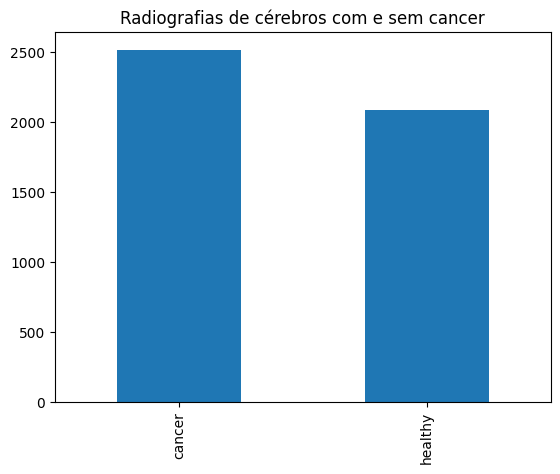

In [ ]:
df_tumor.rotulo.value_counts().plot.bar(title='Radiografias de cérebros com e sem cancer')
plt.show()

Há uma disparidade entre as imagens com e sem cancer.<br>
Para ter uma ter maior robustez no modelo, vamos equilibrar os números.

In [ ]:
# Com a intenção de melhorar os resultados futuros, vou equilibrar o número de resultados.
imagens_com_tumor = df_tumor[df_tumor.rotulo == 'cancer']
imagens_com_tumor = imagens_com_tumor.sample(n=2087, random_state=SEED) # dados balanceados
imagens_com_tumor.shape

(2087, 6)

In [ ]:
# união entre os dados de treino e teste
dados_balanceados = pd.concat([imagens_com_tumor, df_tumor[df_tumor.rotulo == 'healthy']])
dados_balanceados.shape

(4174, 6)

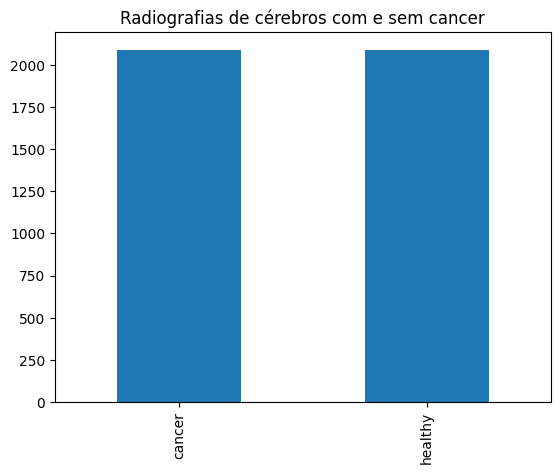

In [ ]:
dados_balanceados.rotulo.value_counts().plot.bar(title='Radiografias de cérebros com e sem cancer')
plt.show()

Mesmo número de imagens

In [ ]:
# visualizar as medidas das imagens disponíveis
dados_balanceados.describe()

,altura,largura,tamanho
count,4174.000000,4174.000000,4174.000000
mean,371.183996,353.216339,27134.672976
std,172.536733,173.496843,37950.330882
min,167.000000,150.000000,3475.000000
25%,236.000000,225.000000,11366.250000
50%,326.000000,276.000000,18556.000000
75%,512.000000,512.000000,27298.750000
max,1446.000000,1920.000000,727906.000000


Podemos observar que das 4174 imagens do dataset é composto por imagens heterogêneas, que têm medidas de 167 a 1446 de altura e de 150 a 1920 de largura.

[voltar para o sumário](#sumario)

<a name="treino&teste-2"></a>
## 2.5 Separação dos dados

Para o treinamento de redes neurais a separação dos dados não se limita a treino e teste, temos 3 grupos de dados:
- Treino
- Teste
- Validação

In [ ]:
# separação das imagens de maneira estratificada para poder ter equilíbrio entre os dados de tumor ou saudáveis
train, test_set = train_test_split(dados_balanceados, test_size=0.3, random_state=SEED, stratify=dados_balanceados.rotulo)

train_set, val_set = train_test_split(train, test_size=0.2, random_state=SEED, stratify=train.rotulo)

In [ ]:
# tamanho dos datasets
test_set.shape

(1253, 6)

In [ ]:
train_set.shape

(2336, 6)

In [ ]:
val_set.shape

(585, 6)

### 2.5.1 Visualização das imagens

Para ter uma noção de como as imagens do projeto se parecem

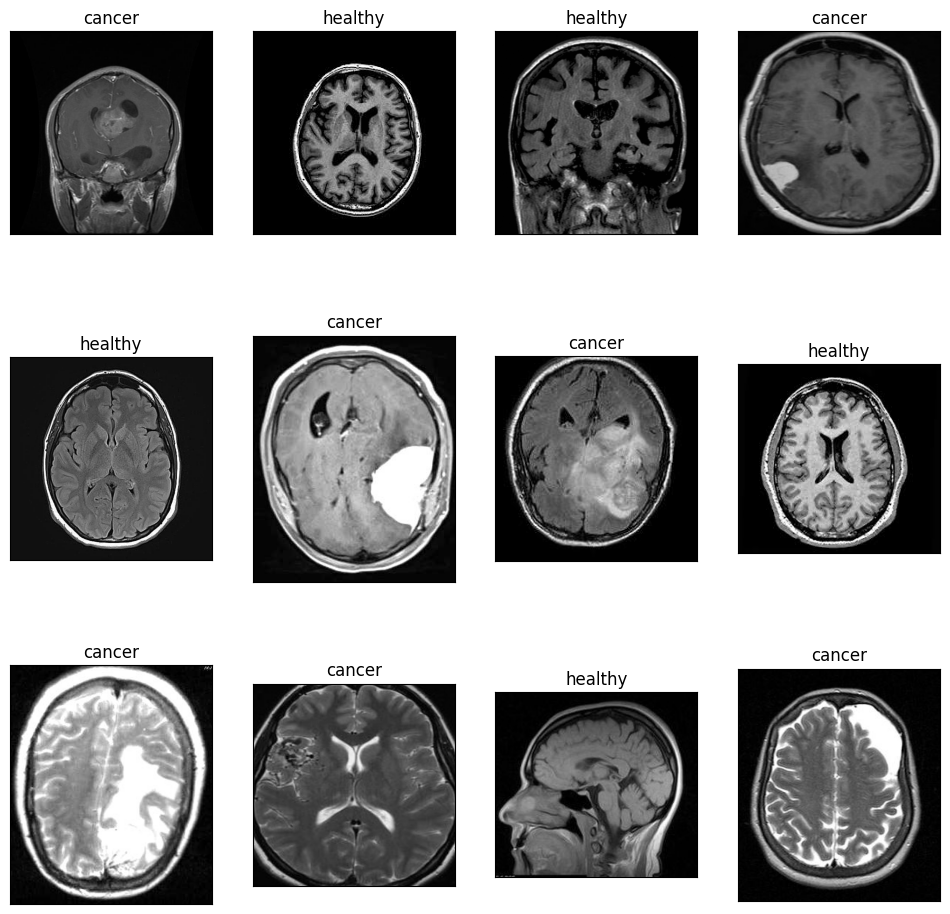

In [ ]:
# Visualizando apenas 12 imagens aleatórias
fig = plt.gcf()
fig.set_size_inches(3*4, 3*4)

sample = train_set.sample(n=12, random_state=SEED)

for i in range(12):
    sp = plt.subplot(3, 4, i + 1)
    #sp.axis('Off')

    img_path = sample['caminho'].iloc[i]

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(sample['rotulo'].iloc[i])


plt.show()

Podemos observar que há imagens de topo e perfil, além de diversos tamanhos, variedade de brilho e contraste.

[voltar para o sumário](#sumario)

<a name="processamento-2"></a>
## 2.6 Pré-processamento

Como há imagens em escala de cinza e outras não, usaremos essa função para deixar todas em rgb

In [ ]:
# função para transformar todas as imagens em rgb
def homogeneizar_cor_imagens(img):
    imagem = tf.image.rgb_to_grayscale(img)
    imagem = tf.image.grayscale_to_rgb(imagem)
    return imagem

### 2.6.1 ImageDataGenerator

Como a base de dados possui um número limitado de imagens, usaremos a função de criação de imagens pra gerar manipulações diversas (rotação, espelhamento, zoom in e zoom out) das imagens originais que serão agregadas à base de treino e validação.

In [ ]:
# definição de "variáveis de ambiente"
BATCH_SIZE = 50
IMAGE_SIZE = (224, 224)


# única manipulação nas imagens de teste será a normalização
image_gen_test = ImageDataGenerator(rescale= 1.0/255, preprocessing_function=homogeneizar_cor_imagens)

image_gen_train = ImageDataGenerator(rescale= 1.0/255, zoom_range=0.30, preprocessing_function=homogeneizar_cor_imagens,
                                     rotation_range=10, horizontal_flip=True, fill_mode='nearest')

#uso do gerador de imagens com a função de importação de um dataframe
imagens_treino_final = image_gen_train.flow_from_dataframe(dataframe= train_set, x_col="caminho", y_col="rotulo", target_size=IMAGE_SIZE,
                                                      class_mode="categorical", batch_size=BATCH_SIZE, color_mode='rgb', shuffle=True,
                                                      seed=SEED)

imagens_validacao_final = image_gen_train.flow_from_dataframe(dataframe= val_set, x_col="caminho", y_col="rotulo", target_size=IMAGE_SIZE,
                                                    class_mode="categorical", batch_size=BATCH_SIZE, color_mode='rgb', shuffle=False)

imagens_teste_final = image_gen_test.flow_from_dataframe(dataframe= test_set, x_col="caminho", y_col="rotulo", target_size=IMAGE_SIZE,
                                                    class_mode="categorical", batch_size=BATCH_SIZE, color_mode='rgb', shuffle=False)

Found 2336 validated image filenames belonging to 2 classes.
Found 585 validated image filenames belonging to 2 classes.
Found 1253 validated image filenames belonging to 2 classes.


In [ ]:
classes=list(imagens_treino_final.class_indices.keys())
print(classes)

['cancer', 'healthy']


In [ ]:
imagens_treino_final.class_indices.values()

dict_values([0, 1])

Neste projeto, o 0 significa cancer e 1 significa saudável

#### Visualização do datagenerator

Found 1 validated image filenames belonging to 1 classes.


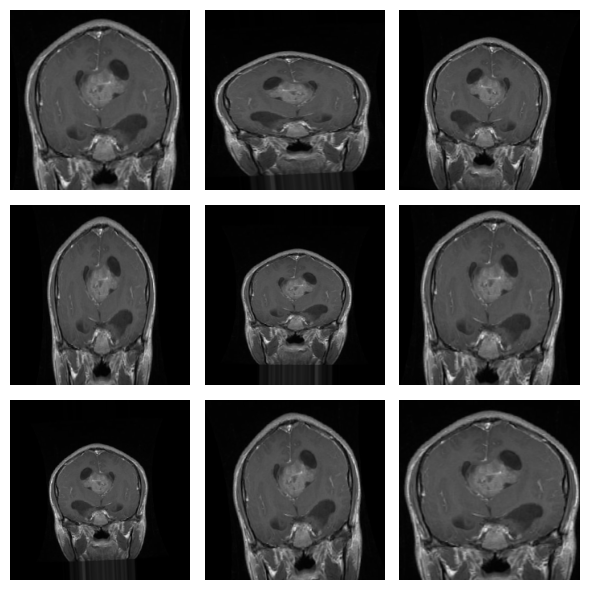

In [ ]:
# Pegando um registro aleatório do conjunto de treino
sample = train_set.sample(n=1, random_state=SEED)

sample_generator = image_gen_train.flow_from_dataframe(dataframe= sample, x_col="caminho", y_col="rotulo", target_size=IMAGE_SIZE,
                                                      class_mode="categorical", batch_size=BATCH_SIZE, color_mode='rgb')

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        image = x_batch[0]
        plt.imshow(image)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

[voltar para o sumário](#sumario)

<a name="modelos-2"></a>
## 2.7 Definição do modelo

Como pudemos observar na parte de importação, escolheu-se o uso do framework TensorFlow com Keras no lugar do Pytorch e não usaremos modelos pré-treinados para o presente trabalho.

In [ ]:
# definição do modelo como sequencial
model = Sequential()

# layer com 4 redes convolucionais e input na primeira
model.add(Conv2D(filters=32,kernel_size=(3,3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# layer flatten para envio dos dados para a camada densa
model.add(Flatten())

# layer densa com 5 camadas (deeplearnig) e dropout de 0,25 entre elas
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(rate= 0.25))
model.add(Dense(32, activation="relu"))

# Output layer
model.add(Dense(2, activation="sigmoid")) #Sigmoid para classes binárias. Softmax para Mutliclasses.

# compilando o modelo
model.compile(optimizer="adam", loss="CategoricalCrossentropy", metrics=["accuracy"])

A presente configuração do modelo foi consequência de aumento gradual de complexidade para atingir um bom resultado nas métricas de precisão e recall.

O crescimento gradual das redes convolucionais foi para garantir uma especificidade até uma visão geral.<br>
Entre cada camada da rede densa usou-se um dropout de 25% para minimizar a possibilidade de overfitting.

In [ ]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

Por causa destes 19,437,922 parâmetros o processamento do trinamento demora 5 horas para executar sem o suporte de GPU

In [ ]:
# salva o modelo na sua melhor pontuação de acurácia de validação
checkpoint = ModelCheckpoint("Melhor_modelo.h5", monitor='val_accuracy', verbose= 1, save_best_only= True, mode='max')

Após alguns testes, decidiu-se que que não usaría o ``EarlyStopping`` neste estudo porque o ganho de tempo não foi significativo em relação ao desempenho.

In [ ]:
#Treinamento da rede neural e validação
History = model.fit(imagens_treino_final, validation_data= imagens_validacao_final, epochs=50, verbose=1, callbacks=[checkpoint])

Epoch 1/50
47/47 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.5325
Epoch 1: val_accuracy improved from -inf to 0.60513, saving model to Melhor_modelo.h5
47/47 [==============================] - 67s 1s/step - loss: 0.6951 - accuracy: 0.5325 - val_loss: 0.6792 - val_accuracy: 0.6051
Epoch 2/50
47/47 [==============================] - ETA: 0s - loss: 0.6522 - accuracy: 0.6186
Epoch 2: val_accuracy improved from 0.60513 to 0.61709, saving model to Melhor_modelo.h5
47/47 [==============================] - 55s 1s/step - loss: 0.6522 - accuracy: 0.6186 - val_loss: 0.6253 - val_accuracy: 0.6171
Epoch 3/50
47/47 [==============================] - ETA: 0s - loss: 0.6058 - accuracy: 0.6755
Epoch 3: val_accuracy improved from 0.61709 to 0.73504, saving model to Melhor_modelo.h5
47/47 [==============================] - 57s 1s/step - loss: 0.6058 - accuracy: 0.6755 - val_loss: 0.5391 - val_accuracy: 0.7350
Epoch 4/50
47/47 [==============================] - ETA: 0s - loss:

Durante a confecção deste trabalho chegou-se a modelos com uma acurácia na validação de até 0,97 com um número de parâmetros menores, mas na hora de aplicar no conjunto de testes os resultados de Precision e recall ficavam na casa de 50%.<br>
Mesmo com essa acurácia de 95,4%, as outras métricas ficaram bem melhores, como veremos a seguir.

[voltar para o sumario](#sumario)

<a name="accvsloss"></a>
## 2.8. Visualização de acurácia vs perda

In [ ]:
# acurácia de treino e validação
acc = History.history["accuracy"]
val_acc = History.history["val_accuracy"]

# perda de treinamento e validação
loss = History.history["loss"]
val_loss = History.history["val_loss"]

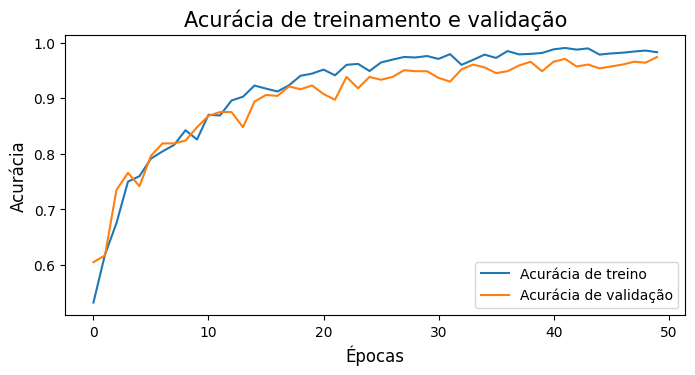

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)

plt.plot(acc,label="Acurácia de treino")
plt.plot(val_acc, label="Acurácia de validação")


plt.ylabel("Acurácia", fontsize=12)
plt.xlabel("Épocas", fontsize=12)
plt.title("Acurácia de treinamento e validação", fontsize=15)

plt.legend(loc='lower right')
plt.show()

Podemos observar que a acurácia de treinamento e validação sobem de maneira consistente, mesmo com uma flutuação na pontuação de validação, podemos considerar que está aceitável e não apresenta características de overfitting ou underfitting

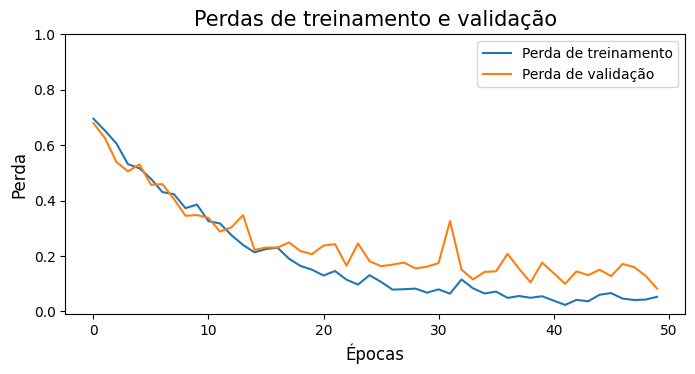

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)

plt.plot(loss, label="Perda de treinamento")
plt.plot(val_loss, label="Perda de validação")

plt.ylim([min(plt.ylim()),1])

plt.ylabel("Perda", fontsize=12)
plt.xlabel("Épocas", fontsize=12)
plt.title("Perdas de treinamento e validação", fontsize=15)

plt.legend()
plt.show()

Podemos observar que a perda de treinamento e validação descem de maneira consistente, mesmo com uma flutuação entre as épocas 30 e 40 na pontuação de validação, podemos considerar que está aceitável e não apresenta características de overfitting ou underfitting

[voltar ao sumário](#sumario)

<a name="melhorModelo"></a>
## 2.9 Carregamento da melhor configuração do modelo

In [ ]:
modelo_salvo = load_model("Melhor_modelo.h5")
modelo_salvo

### 2.9.1 Avalliação do melhor modelo

In [ ]:
# Melhor modelo do treinamento
test_loss, test_acc = modelo_salvo.evaluate(imagens_teste_final, verbose=1)
print(f"Resultado com dados de teste: accuracy = {test_acc}  ;  loss = {test_loss}")

26/26 [==============================] - 10s 379ms/step - loss: 0.1181 - accuracy: 0.9681
Resultado com dados de teste: accuracy = 0.9680765867233276  ;  loss = 0.11810580641031265


<a name="previsao"></a>
## 2.10 Execução do modelo no conjunto de treino

In [ ]:
# previsão no conjunto de teste
predictions = modelo_salvo.predict(imagens_teste_final)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = imagens_teste_final.classes

26/26 [==============================] - 8s 295ms/step


In [ ]:
# código para transformar o número em palavra
dic_classes = {0:'cancer', 1:'healthy'}
pred_nomes = []

for i in predicted_labels:
    pred_nomes.append(dic_classes[i])

pred_nomes[:5]

['healthy', 'cancer', 'cancer', 'cancer', 'healthy']

[voltar ao sumário](#sumario)

<a name="resultados-2"></a>
## 2.11 Avaliação do modelo

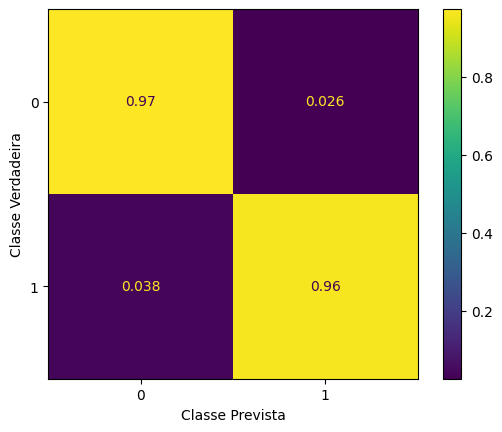

In [ ]:
# Matriz de confusão (teste)
matriz_confusao = confusion_matrix(true_labels, predicted_labels, normalize='true')
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

O modelo tem um bom desempenho considerando, principalmente o número de falsos negativos, que conforme dito na parte 1 deste trabalho, é a métrica mais importante para a aplicação na saúde.

In [ ]:
# Imprimir o relatório de métricas
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       627
           1       0.97      0.96      0.97       626

    accuracy                           0.97      1253
   macro avg       0.97      0.97      0.97      1253
weighted avg       0.97      0.97      0.97      1253



[voltar para o sumário](#sumario)

<a name="conclusao-2"></a>
## 2.12 Conclusão

Podemos comprovar que o uso de visão computacional para ajudar aos profissionais da saúde na triagem de pacientes para serem atendidos por especialistas é de grande importância e funcionalidade.<br>
O uso da inteligência artificial na saúde para apoio à decisão e auxílio de modelos como este para não especialistas em radiografia para melhor atender às pessoas é factível.